In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("Retail_data.csv")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
missing = data.isnull().sum()
missing

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.shape

(541909, 8)

Since we are trying to create **segments of customers**, we can not use transactions without `CustomerID`. Hence removing missing data.

In [6]:
data = data.dropna()

In [7]:
data.shape

(406829, 8)

In [8]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
data['CustomerID']=data['CustomerID'].astype('category')

In [11]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID           category
Country                object
dtype: object

In [12]:
## No of unique customers
data['CustomerID'].nunique()

4372

Because we want to segment customers, we need to group by their `CustomerIDs` and aggregate their `total spent`, `number of orders`, `last visit`

In [13]:
#calculating the order amount
data['Order_amount'] = data['Quantity']*data['UnitPrice']

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
#Creating empty dataframe for use later.
grouped_data = pd.DataFrame()

In [16]:
grouped_data['spent']=data.groupby(data['CustomerID']).sum()['Order_amount']

In [17]:
grouped_data['visits'] = data.groupby(data['CustomerID']).count()['InvoiceNo']

In [18]:
grouped_data.shape

(4372, 2)

In [19]:
grouped_data.describe

<bound method NDFrame.describe of               spent  visits
CustomerID                 
12346.0        0.00       2
12347.0     4310.00     182
12348.0     1797.24      31
12349.0     1757.55      73
12350.0      334.40      17
...             ...     ...
18280.0      180.60      10
18281.0       80.82       7
18282.0      176.60      13
18283.0     2094.88     756
18287.0     1837.28      70

[4372 rows x 2 columns]>

In [20]:
grouped_data.head()

,spent,visits
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17


In [21]:
#Lets calculate number of days since last visit
# Before subtracting dates, it is a good idea to set date format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%d-%m-%Y %H:%M')
#Consider the last date as reference.
data['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [22]:
max(data['InvoiceDate'])

Timestamp('2011-12-10 17:19:00')

In [23]:
data['InvoiceDate'].min()

Timestamp('2010-01-12 08:26:00')

We have an year of data

In [24]:
data['Days_since_last_visit'] = (max(data['InvoiceDate']) - data['InvoiceDate']).dt.days     ## extracting only number of days

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_amount,Days_since_last_visit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,697


In [26]:
grouped_data['Days_since_last_visit'] = data.groupby(['CustomerID']).min()['Days_since_last_visit']

In [27]:
grouped_data.head()

,spent,visits,Days_since_last_visit
CustomerID,,,
12346.0,0.00,2,326
12347.0,4310.00,182,40
12348.0,1797.24,31,76
12349.0,1757.55,73,19
12350.0,334.40,17,311


### EDA

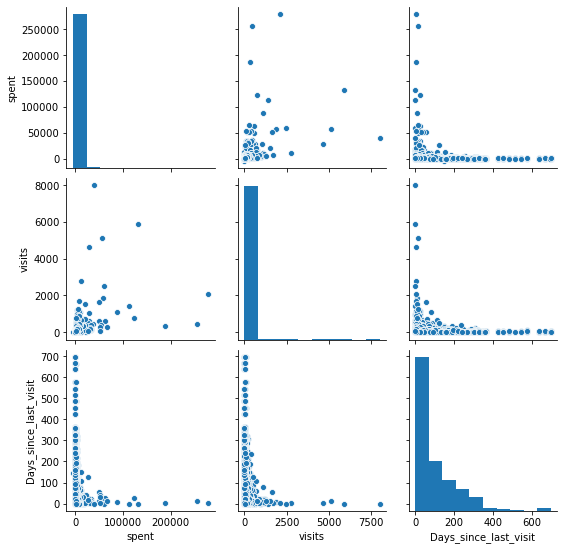

In [28]:
sns.pairplot(grouped_data)

We can see that there are some outliers in all 3 features

Lets have a look through boxplots

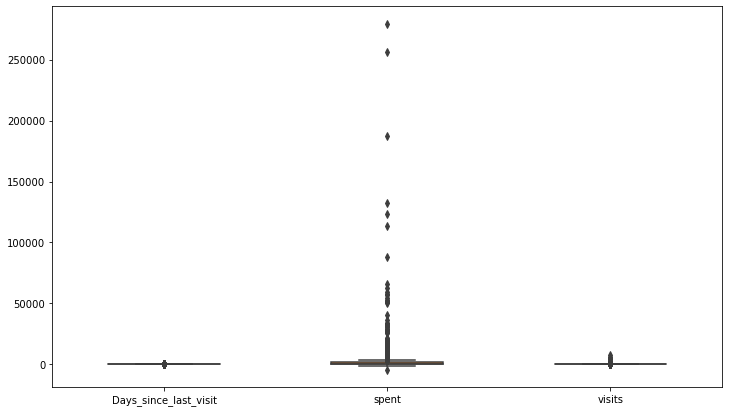

In [29]:
plt.rcParams["figure.figsize"] = (12,7)
sns.boxplot(data=grouped_data[['Days_since_last_visit', 'spent', 'visits']], orient ='v', width=0.5, whis=1.5);

#### Lets remove the outliers

Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [30]:
from scipy import stats

In [31]:
grouped_data.visits

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: visits, Length: 4372, dtype: int64

In [32]:
Q1 = grouped_data.spent.quantile(0.05)
Q3 = grouped_data.spent.quantile(0.95)
IQR = Q3-Q1
grouped_data = grouped_data[(grouped_data.spent >= Q1 - 1.5*IQR) & (grouped_data.spent <= Q3 + 1.5*IQR)]  # given opposite in the reference  ##this will remove the outlier quantiles of spent column without hurting other columns

Q1 = grouped_data.visits.quantile(0.05)
Q3 = grouped_data.visits.quantile(0.95)
IQR = Q3-Q1
grouped_data = grouped_data[(grouped_data.visits >= Q1 - 1.5*IQR) & (grouped_data.visits <= Q3 + 1.5*IQR)]

Q1 = grouped_data.Days_since_last_visit.quantile(0.05)
Q3 = grouped_data.Days_since_last_visit.quantile(0.95)
IQR = Q3-Q1
grouped_data = grouped_data[(grouped_data.Days_since_last_visit >= Q1 - 1.5*IQR) & (grouped_data.Days_since_last_visit <= Q3 + 1.5*IQR)]

In [33]:
grouped_data.head()

,spent,visits,Days_since_last_visit
CustomerID,,,
12346.0,0.00,2,326
12347.0,4310.00,182,40
12348.0,1797.24,31,76
12349.0,1757.55,73,19
12350.0,334.40,17,311


We have our dataframe ready for segmentation.

For this, we will use `K-means clustering` from `scikit-learn`.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
grouped_data_scaled = scaler.fit_transform(grouped_data)

In [37]:
grouped_data_scaled = pd.DataFrame(grouped_data_scaled)
grouped_data_scaled.columns = ['spent','visits','Days_since_last_visit']

In [38]:
grouped_data_scaled.head()

,spent,visits,Days_since_last_visit
0,-0.723738,-0.752888,1.954651
1,1.731617,1.042467,-0.546982
2,0.300128,-0.463636,-0.232091
3,0.277517,-0.044720,-0.730668
4,-0.533235,-0.603275,1.823447


In [39]:
# Importing KMeans
from sklearn.cluster import KMeans

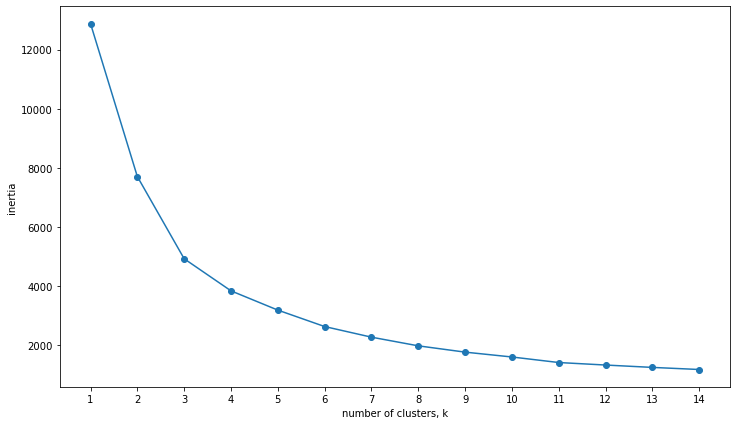

In [40]:
#choosing a good number of clusters for a dataset using the k-means inertia graph
ks = range(1,15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    # Fit model to samples
    model.fit(grouped_data_scaled)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Its not easy to determine how many clusters to consider. So, lets try `hieratchical clustering algorithm` to create a dendogram to determine clusters

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

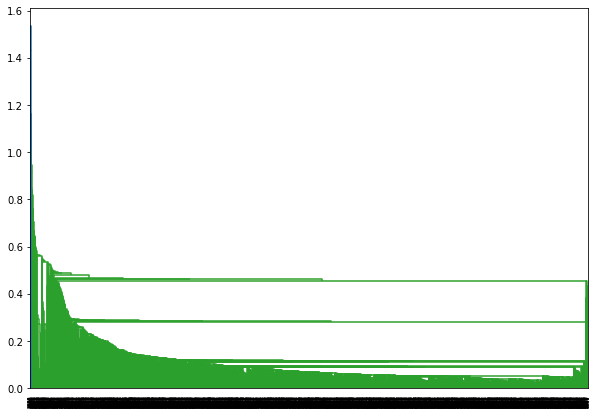

In [42]:
linked = linkage(grouped_data_scaled, 'single')
labellist = range(1,11)

plt.figure(figsize = (10,7))
dendrogram(linked,
          orientation = 'top',
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

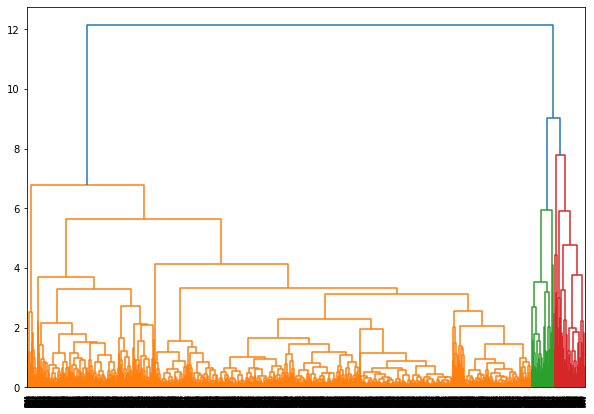

In [43]:
linked = linkage(grouped_data_scaled, 'complete')
labellist = range(1,11)

plt.figure(figsize = (10,7))
dendrogram(linked,
          orientation = 'top',
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

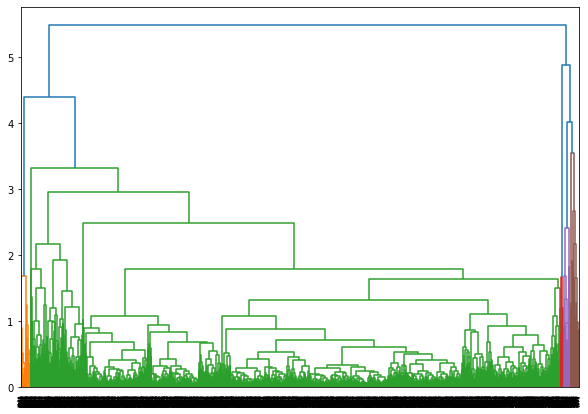

In [44]:
linked = linkage(grouped_data_scaled, 'average')
labellist = range(1,11)

plt.figure(figsize = (10,7))
dendrogram(linked,
          orientation = 'top',
          distance_sort = 'descending',
          show_leaf_counts = True)
plt.show()

## From complete and average linkage, it seems 3 clusters would be fine.

In [45]:
#easy way to fit and call labels
model = KMeans(n_clusters=3, max_iter = 50)

In [46]:
model.fit(grouped_data_scaled)
model.labels_

array([0, 1, 2, ..., 2, 2, 2])

In [47]:
grouped_data['label'] = model.labels_

In [48]:
grouped_data.head()

,spent,visits,Days_since_last_visit,label
CustomerID,,,,
12346.0,0.00,2,326,0
12347.0,4310.00,182,40,1
12348.0,1797.24,31,76,2
12349.0,1757.55,73,19,2
12350.0,334.40,17,311,0


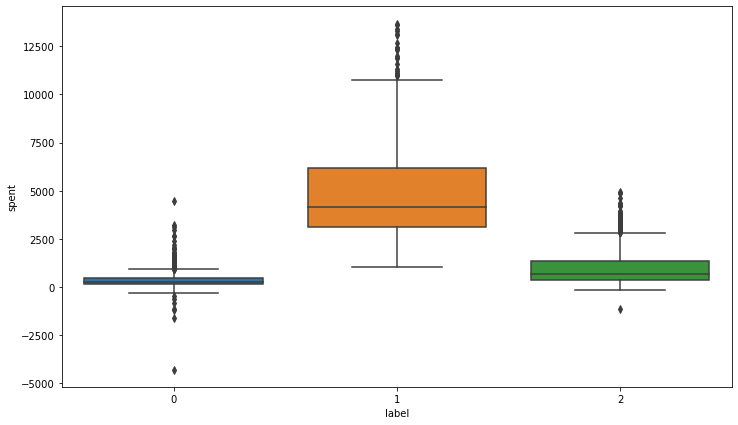

In [49]:
sns.boxplot(x='label', y='spent', data=grouped_data)

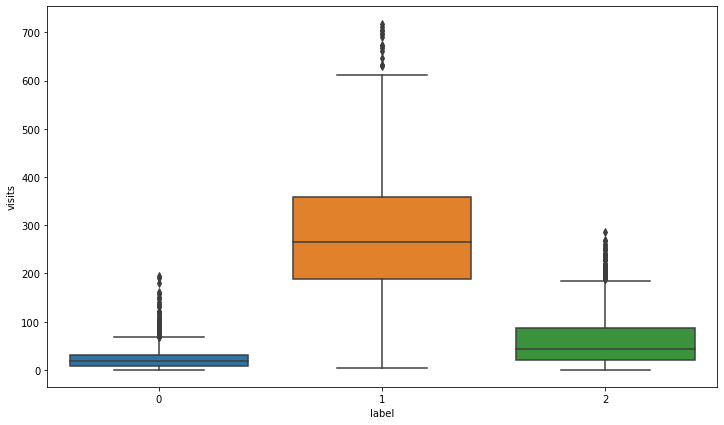

In [50]:
sns.boxplot(x='label', y='visits', data=grouped_data)

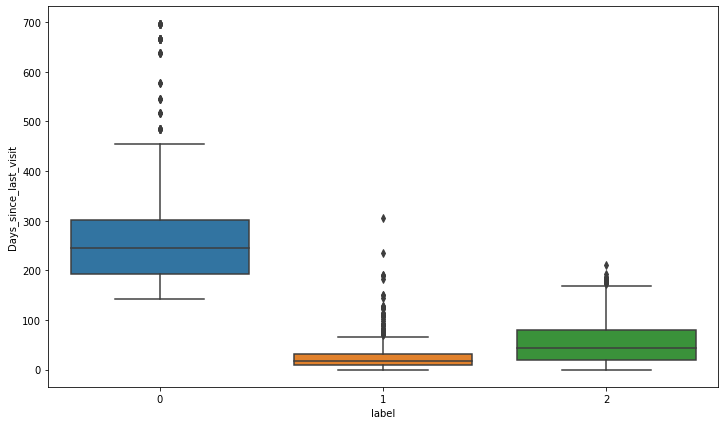

In [51]:
sns.boxplot(x='label', y='Days_since_last_visit', data=grouped_data);

## Conclusion
___
#### Cluster 0: *Patriots*
* These are the customers who spend the most on their total purchases and visit the website quite frequently with mean recent visit less than 50 days. 
* These customers are loyal to the platform and do not need to be included in customer acquision campaign. They are probably the promotors of the company hence they can be given referral bonus to bring more customers to the website.

#### Cluster 1: *Occasional shoppers*
* sweet spot
* The customers are occassional shoppers, they do not spend a lot and visit the store occassionally.
* These customers should be targetted with offers and discounts to create more engagement and subsequently be converted to regular shoppers. 

#### Cluster 2: *Lost birds*
* These customers have spent very less to nothing in the last year with their visits limited to only once or twice a year. They haven't purchased anything from the website in a long time.
* These customers seem to have moved due to unknown reasons and acquiring them will be expensive. It is suggested to target cluster 1 first and move 2 cluster 2 if permitted by the marketing budget.